# Image Segmentation


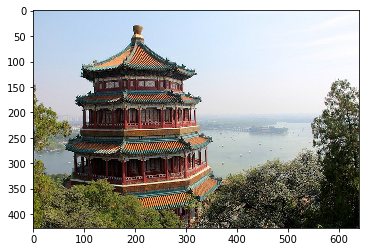

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

china = load_sample_image("china.jpg")
image = china /255
plt.imshow(image)

In [5]:
print(np.shape(image))
X =image.reshape(-1,3)
print(np.shape(X))

(427, 640, 3)
(273280, 3)


현재 이미지는 2차원에 퍼져있기에 (2차원 공간, RGB 공간) 형식으로 되어있다. 이를 RGB 공간에 한 점으로 온전하게 나타내기 위해서는 RGB 공간만 가지고 있는 데이터가 필요하다. 따라서 현재 이미지 데이터의 shape를 (pixel 개수, RGB값)으로 변경해주어야 한다.

In [6]:
kmeans=KMeans(n_clusters=6).fit(X)

In [7]:
segmented_img=kmeans.cluster_centers_[kmeans.labels_]
print(kmeans.cluster_centers_)
print(segmented_img)
segmented_img=segmented_img.reshape(image.shape)

[[0.46648286 0.42694062 0.3093813 ]
 [0.76235358 0.8169425  0.86680535]
 [0.10004274 0.08777092 0.0606561 ]
 [0.65219378 0.61218459 0.54239049]
 [0.28468083 0.25260334 0.17687218]
 [0.91037284 0.93963415 0.97656687]]
[[0.76235358 0.8169425  0.86680535]
 [0.76235358 0.8169425  0.86680535]
 [0.76235358 0.8169425  0.86680535]
 ...
 [0.28468083 0.25260334 0.17687218]
 [0.10004274 0.08777092 0.0606561 ]
 [0.10004274 0.08777092 0.0606561 ]]


kmeans.cluster_centers_ : 이 값은 중심점을 준다.\
kmeans.cluster_centers_[kmeans.labels_]: 이 값은 중심점에 해당하는 값을 그룹에 포함된 개별점의 개수만큼 반환한다.

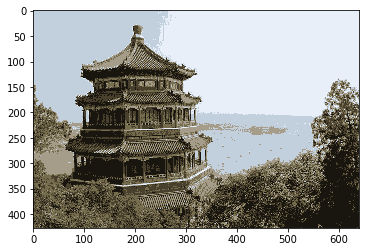

In [8]:
plt.imshow(segmented_img)

6개의 색으로는 위 그림을 완벽하게 재현할 수는 없다. 마치 흑백사진처럼 되었다.

## Optimal Clustering Number Searching

### Elbow Method

적절한 Clutering 개수를 찾는 방법으로 Elbow Method가 있다. Elbow Method는 클러스터링 개수에 대한 inertia score 그래프에서 급격하게 꺽이는 (기울기가 변하는) 점을 찾는 것이다.

In [9]:
kiner = {}
for K in range(2,10):
    kmeans=KMeans(n_clusters=K)
    kmeans.fit(X)
    kiner[K]=kmeans.inertia_

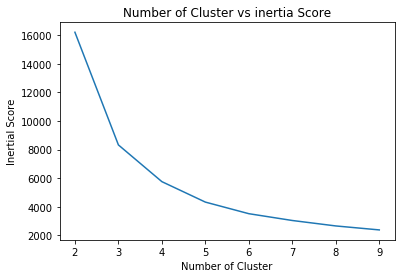

In [10]:
plt.plot(list(kiner.keys()),list(kiner.values()))
plt.title("Number of Cluster vs inertia Score")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertial Score")
plt.show()

급격하게 꺽이는 점으로 3, 4가 보인다. 따라서 3,4에 대해서 cluster를 해보겠다.

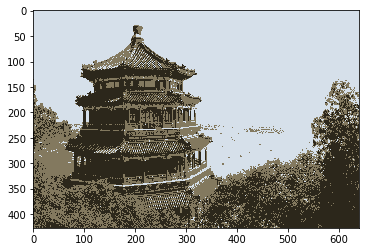

In [11]:
kmeans=KMeans(n_clusters=3).fit(X)
segmented_img=kmeans.cluster_centers_[kmeans.labels_]
segmented_img=segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

3가지의 색으로만 Clustering을 하였을 때는 색은 알아볼 수 없지만, 형태는 알 수 있다.

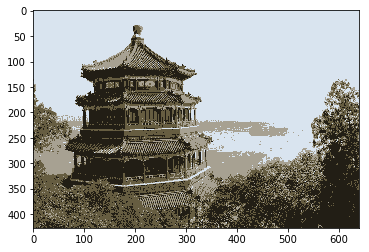

In [12]:
kmeans=KMeans(n_clusters=4,n_jobs=-1).fit(X)
segmented_img=kmeans.cluster_centers_[kmeans.labels_]
segmented_img=segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

4가지의 색으로만 Clustering을 하였을 때 또한, 3가지로 clustering 했을 때와 유사한 결과가 나왔다. 과연 색을 알아볼 수 있을 법한 최소한의 clustering값은 얼마일까?

In [14]:
kiner = {}
for K in range(10,20):
    kmeans=KMeans(n_clusters=K,n_jobs=-1)
    kmeans.fit(X)
    kiner[K]=kmeans.inertia_

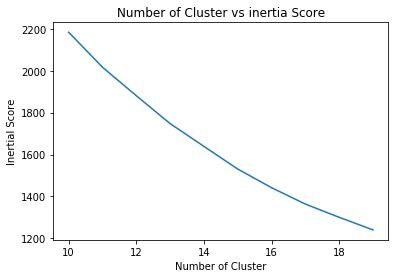

In [15]:
plt.plot(list(kiner.keys()),list(kiner.values()))
plt.title("Number of Cluster vs inertia Score")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertial Score")
plt.show()

이후에 값에서 기울기가 급격하게 변하는 점을 찾기가 힘들기에 다른 방법을 찾아보았다. 그랬을 때 Clustering을 평가하는 지수로 실루엣 지수 또한 많이 사용한다고 하여서 이를 적용해 보았다.

### silhouette Method

여기서 Silhouette score는 다음과 같다.

$$(Silhouette\;Score)=\frac{가장 \; 가까운\;다른\;그룹과의\;평균 거리-같은\;그룹\;내의\;점들의\;평균\;거리}{가장\;멀리\;떨어진\;점과의\;거리}$$

In [16]:
from sklearn.metrics import silhouette_score

kiner = {}
sil ={}

for k in range(2,20):
    cluster_nums=k
    kmeans=KMeans(n_clusters=cluster_nums,n_jobs=-1)
    kmeans.fit(X)
    kiner[cluster_nums]=kmeans.inertia_
    
    sil[cluster_nums]=silhouette_score(X, kmeans.labels_,sample_size=10000)
    #Sample 개수가 매우 많아서, score에 사용할 sample 개수를 설정해 주었다.

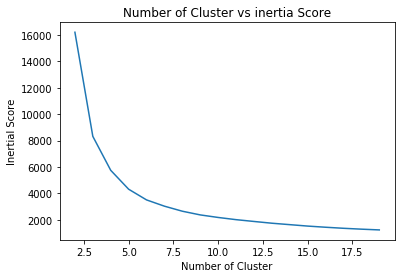

In [17]:
plt.figure("Inertial Score")
plt.plot(list(kiner.keys()),list(kiner.values()))
plt.title("Number of Cluster vs inertia Score")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertial Score")
plt.show()

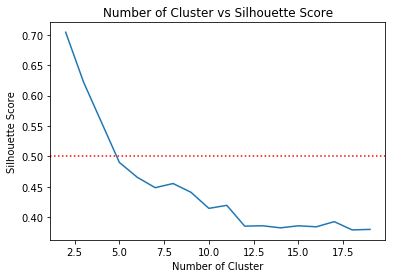

In [18]:
plt.figure("Silhouette Score")
plt.plot(list(sil.keys()),list(sil.values()))
plt.title("Number of Cluster vs Silhouette Score")
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Score")
plt.axhline(0.5,color='red', linestyle=':')
plt.show()

Silhouette Score는 특정 점을 기준으로 하는 것이라서 위의 그래프의 점수는 모든 점수의 평균값이다.\
보통 Silhoueete Score는 0.5을 기준으로 이보다 높은 점을 좋게 평가한다. 그러나 3,4가 만족할만한 색을 주지 않았기에, 급격하게 커지는 "8"로 clustering을 해보겠다.

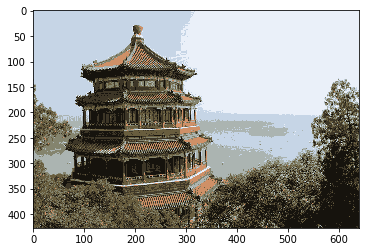

In [19]:
kmeans=KMeans(n_clusters=8,n_jobs=-1).fit(X)
segmented_img=kmeans.cluster_centers_[kmeans.labels_]
segmented_img=segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

그랬을 때, 이제서야 어렴풋하게 나마 그림에서 색을 구분할 수 있게 나왔다.

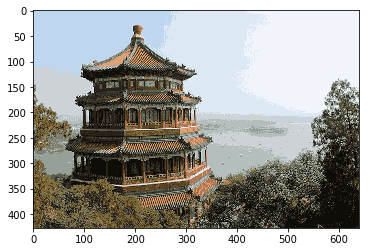

In [20]:
kmeans=KMeans(n_clusters=15,n_jobs=-1).fit(X)
segmented_img=kmeans.cluster_centers_[kmeans.labels_]
segmented_img=segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

그다음에 peak가 있는 11에서 해보았으나 큰 차이를 찾지 못했고, 그 다음 peak인 15에서 해보았을 때, 그제서야 처마의 청록색을 구분할 수 있게 끔 나왔다. 확실히 앞선 inertia score를 이용한 값보다, Silhouette Score를 이용한 것이 시간은 더 걸리지만 정확한 것 같다.

## Graph for Kmeans Clustering Result

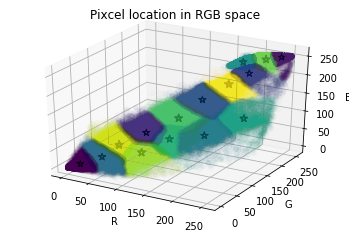

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(*(255*np.transpose(kmeans.cluster_centers_)),marker="*",c=range(15),edgecolor='black',s=60,linewidths=1.5,alpha=1)
ax.scatter(*(255*np.transpose(X)),c=kmeans.labels_,alpha=0.02)
ax.set_xlabel("R");ax.set_ylabel("G");ax.set_zlabel("B")
ax.set_title("Pixcel location in RGB space")
plt.show()

RGA 공간에서 실제 pixel들이 어떻게 분류가 되었는지 보기 위해서, 3D 그래프로 그려보았다. 이를 보았을 때 점의 개수가 너무 많아서, 그저 점들을 공간에서 n등분한 것처럼 보인다. 별로된 점은 중심점을 나타낸다.

In [26]:
N=10000
sel=np.arange(np.shape(X)[0])
np.random.shuffle(sel)
X_sample=X[sel[:N]]

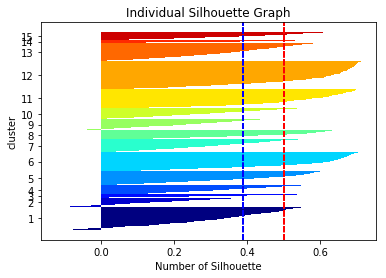

In [27]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

def plotSilhouette(X,y_km):
    cluster_labels=np.unique(y_km) #분류된 cluster의 종류.
    n_clusters=cluster_labels.shape[0] #분류된 cluster 개수.
    silhouette_vals=silhouette_samples(X,y_km,metric='euclidean') #개별 값의 실루엣 스코어.
    y_ax_lower, y_ax_upper = 0,0
    yticks=[]
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals=silhouette_vals[y_km==c] #분류된 것 별로 실루엣 스코어를 나눔.
        c_silhouette_vals.sort() #나눈 스코어를 크기순으로 정렬.
        y_ax_upper += len(c_silhouette_vals)
        color= cm.jet(i/n_clusters)
        plt.barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals, height=1.0,
                 edgecolor='none',color=color) #실루엣 스코어에 해당하는 bar그래프를 그리기.
        yticks.append((y_ax_lower+y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
        silhoutte_avg=np.mean(silhouette_vals) #위의 실루엣 스코어와 같은 값.
        plt.axvline(silhoutte_avg, color='blue',linestyle='--')
        plt.axvline(0.5, color='red',linestyle='--')
        plt.yticks(yticks,cluster_labels+1)
        plt.title("Individual Silhouette Graph")
        plt.ylabel("cluster")
        plt.xlabel("Number of Silhouette")

y_km= kmeans.fit_predict(X_sample)

plotSilhouette(X_sample,y_km)

이 그래프 또한 너무 많은 데이터가 있어서, 10,000 개를 임의로 추려서 그래프를 그렸다. 그랬을 때, blue line이 Silhouette Score의 평균값, red line이 0.5가 되는 값이다. 0.5보다 작게 나왔기에 cluster만을 생각하면 적절한 cluster라고는 할 수 없다.

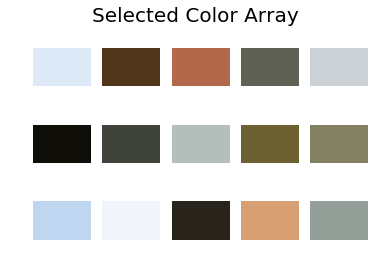

In [28]:

for idx,RGB in enumerate(kmeans.cluster_centers_):
    plt.subplot(3,5,(idx+1)) #15개라서 3,5. cluster 개수마다 달리 설정 필요.
    plt.imshow(RGB*np.ones(image.shape))
    plt.axis('off')
    
plt.suptitle("Selected Color Array",fontsize=20)
plt.show()

위와 같은 15종의 색이 위 그림을 나타는 데에 사용된 15개의 색이다.